# Plotting the filters

In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
# modelPath = ".model_checkpoint/validationset/bps-augmentednet-rmsproplr01-210526T143649/94-4.336-0.7938.hdf5" # best accuracy
# modelPath = ".model_checkpoint/prototyping/dropout-210528T215602/82-4.383-0.7917.hdf5" # with dropout
# modelPath = ".model_checkpoint/validationset/rmsprop-lr0001-200epochs-210529T090623/171-4.237-0.7809.hdf5" # low learning rate, 200 epochs
# modelPath = ".model_checkpoint/testset/haydnop20-augmentednet-alldata-210513T195252/23-3.821-0.8027.hdf5" # all data, evaluated on haydn
# modelPath = ".model_checkpoint/validationset/rmsprop-learningschedule-piecewise-210530T101943/55-4.175-0.7928.hdf5" # piecewise learning schedule
# modelPath = ".model_checkpoint/validationset/rmsprop-learningschedule-piecewise-stair-210530T170008/44-4.311-0.7949.hdf5" # piecewise stair
# modelPath = ".model_checkpoint/validationset/wirwtc-rotatinglrschedule-210530T215055/55-5.002-0.7453.hdf5" # wirwtc rotating lr
# modelPath = ".model_checkpoint/validationset/bps-lr01-0001-210530T233203/55-4.109-0.7956.hdf5" # bps, 01 to 0001
modelPath = ".model_checkpoint/validationset/bps-lr01-0001-210530T233203/46-4.088-0.7950.hdf5" # same as before, but lower loss instead of highest accuracy

In [5]:
filters, biases = model.layers[2].get_weights()

In [6]:
filters = (filters - filters.min()) / (filters.max() - filters.min())

First filter of first convolutional layer

<AxesSubplot:>

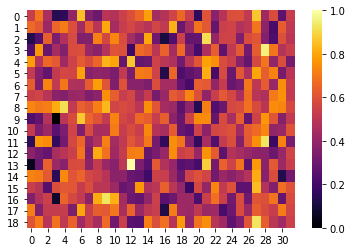

In [7]:
sns.heatmap(filters[0], cmap="inferno")

# Exploring outputs of model

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_Bass19 (InputLayer)           [(None, 640, 19)]    0                                            
__________________________________________________________________________________________________
X_Chromagram19 (InputLayer)     [(None, 640, 19)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 640, 32)      640         X_Bass19[0][0]                   
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 640, 32)      640         X_Chromagram19[0][0]             
______________________________________________________________________________________________

In [9]:
[l.name for l in model.layers]

['X_Bass19',
 'X_Chromagram19',
 'conv1d',
 'conv1d_6',
 'batch_normalization',
 'batch_normalization_6',
 'activation',
 'activation_6',
 'concatenate',
 'concatenate_6',
 'conv1d_1',
 'conv1d_7',
 'batch_normalization_1',
 'batch_normalization_7',
 'activation_1',
 'activation_7',
 'concatenate_1',
 'concatenate_7',
 'conv1d_2',
 'conv1d_8',
 'batch_normalization_2',
 'batch_normalization_8',
 'activation_2',
 'activation_8',
 'concatenate_2',
 'concatenate_8',
 'conv1d_3',
 'conv1d_9',
 'batch_normalization_3',
 'batch_normalization_9',
 'activation_3',
 'activation_9',
 'concatenate_3',
 'concatenate_9',
 'conv1d_4',
 'conv1d_10',
 'batch_normalization_4',
 'batch_normalization_10',
 'activation_4',
 'activation_10',
 'concatenate_4',
 'concatenate_10',
 'conv1d_5',
 'conv1d_11',
 'batch_normalization_5',
 'batch_normalization_11',
 'activation_5',
 'activation_11',
 'concatenate_5',
 'concatenate_11',
 'concatenate_12',
 'dense',
 'batch_normalization_12',
 'activation_12',
 'dens

In [10]:
model.inputs

[<KerasTensor: shape=(None, 640, 19) dtype=float32 (created by layer 'X_Bass19')>,
 <KerasTensor: shape=(None, 640, 19) dtype=float32 (created by layer 'X_Chromagram19')>]

In [11]:
newModel = keras.Model(inputs=model.inputs[0], outputs=model.layers[6].output)

In [12]:
newModel.layers

In [13]:
exampleInput = np.zeros((640, 19))
spellings = {
    (0, 10): "C--", (0, 11): "C-", (0, 0): "C", (0, 1): "C#", (0, 2): "C##",
    (1, 0): "D--", (1, 1): "D-", (1, 2): "D", (1, 3): "D#", (1, 4): "D##",
    (2, 2): "E--", (2, 3): "E-", (2, 4): "E", (2, 5): "E#", (2, 6): "E##",
    (3, 3): "F--", (3, 4): "F-", (3, 5): "F", (3, 6): "F#", (3, 7): "F##",
    (4, 5): "G--", (4, 6): "G-", (4, 7): "G", (4, 8): "G#", (4, 9): "G##",
    (5, 7): "A--", (5, 8): "A-", (5, 9): "A", (5, 10): "A#", (5, 11): "A##",
    (6, 9): "B--", (6, 10): "B-", (6, 11): "B", (6, 0): "B#", (6, 1): "B##",
}
numberOfSpellings = len(spellings)

for idx, (letter, pc) in enumerate(spellings.keys()):
    exampleInput[idx][letter] = 1
    exampleInput[idx][7 + pc] = 1

exampleInput = exampleInput.reshape((1, 640, 19))

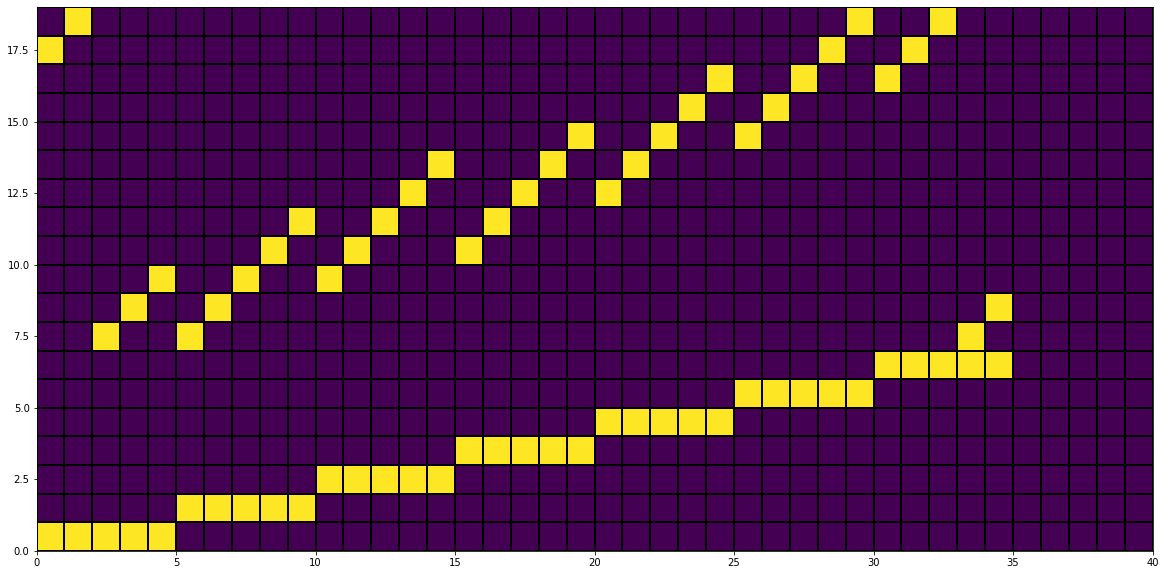

In [14]:
plt.figure(figsize=(20,10))
plt.pcolormesh(exampleInput[0][:numberOfSpellings+5].T, edgecolors="k")

In [15]:
activations = newModel.predict(exampleInput)[0][:numberOfSpellings+5].T

In [16]:
activations[0]

array([0.23059544, 0.13763982, 0.08231355, 0.24872684, 0.        ,
       0.19754568, 0.36395895, 0.        , 0.17765899, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15397562, 0.        , 0.45913383, 0.2942595 , 0.1338621 ,
       0.23302396, 0.0681496 , 0.        , 0.22230072, 0.12934507,
       0.00667064, 0.32121912, 0.2282635 , 0.17293723, 0.3393505 ,
       0.07711657, 0.07711657, 0.07711657, 0.07711657, 0.07711657],
      dtype=float32)

In [17]:
activations.shape

(32, 40)

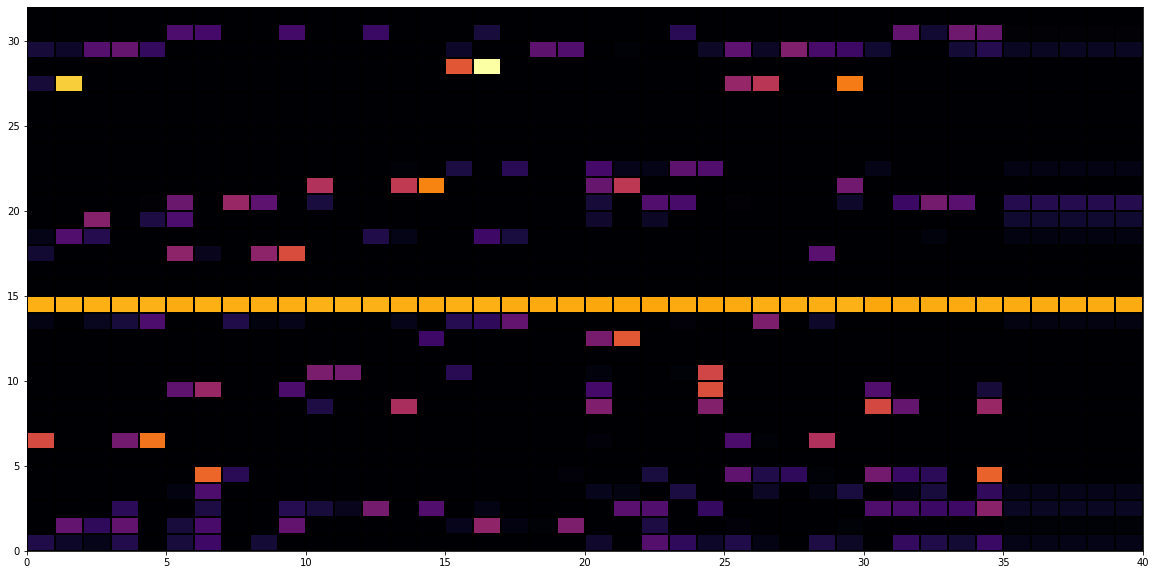

In [18]:
plt.figure(figsize=(20,10))
plt.pcolormesh(activations, edgecolors="k", cmap="inferno")

In [19]:
for fidx, f in enumerate(activations):
    threshold = 0.5
    idxAct = [(idx, act) for idx, act in enumerate(f[:numberOfSpellings]) if act > threshold]
    idxAct.sort(key=lambda x: x[1], reverse=True)
    highActivations = [x[0] for x in idxAct]
#     print(highActivations)
    noteSpellings = list(spellings.values())
    notesActivated = [noteSpellings[idx] for idx in highActivations]
    print(f"Filter{fidx}: {notesActivated}")

Filter0: []
Filter1: ['F-', 'F##', 'C-', 'C#', 'D##']
Filter2: ['B##', 'E']
Filter3: []
Filter4: ['D-', 'B##', 'B--', 'A--']
Filter5: []
Filter6: ['C##', 'C--', 'A#', 'C#']
Filter7: []
Filter8: ['B--', 'E#', 'B##', 'G##', 'G--', 'B-']
Filter9: ['G##', 'D-', 'D--']
Filter10: ['G##', 'E--', 'E-']
Filter11: []
Filter12: ['G-', 'G--']
Filter13: ['A-', 'F']
Filter14: ['E-', 'C#', 'E', 'C-', 'E--', 'C##', 'A##', 'F--', 'F-', 'C', 'C--', 'D-', 'D#', 'A#', 'D##', 'A-', 'D', 'B##', 'E#', 'A', 'B', 'E##', 'D--', 'F', 'A--', 'F#', 'B#', 'B-', 'F##', 'G#', 'B--', 'G##', 'G--', 'G-', 'G']
Filter15: []
Filter16: []
Filter17: ['D##', 'D--', 'D#']
Filter18: []
Filter19: ['C']
Filter20: ['D', 'B', 'D--']
Filter21: ['E##', 'E#', 'G-', 'E--', 'A##', 'G--']
Filter22: ['G#']
Filter23: []
Filter24: []
Filter25: []
Filter26: []
Filter27: ['C-', 'A##', 'A-', 'A--']
Filter28: ['F-', 'F--']
Filter29: ['A', 'C#', 'F#']
Filter30: ['B#', 'B##', 'B-']
Filter31: []
